In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## get data

In [2]:
#get data
data_df = pd.read_csv('data/RF_data/mydata.csv')
data_labels = np.load('data/RF_data/mydata_labels.npy')
#0 = invalid, 1 = valid

In [3]:
data_df

,DC,KID,LPH,Mass,Prot,Prot_err,Teff,logg,w
0,0,892376,0.823,0.4699,1.532,0.007,3813,4.47,0.4503
1,0,1026146,1.405,0.6472,14.891,0.120,4261,4.57,0.7229
2,0,1026474,1.204,0.5914,1.569,0.006,4122,4.56,0.6061
3,1,1162635,0.978,0.4497,15.678,0.019,3760,4.77,0.5445
4,0,1164102,0.568,0.5606,31.496,0.474,4045,4.62,0.3939
5,1,1292688,0.530,0.4550,42.659,2.131,3774,4.74,0.3172
6,0,1297303,0.777,0.6613,27.333,0.193,4296,4.61,0.5124
7,0,1429921,0.943,0.6295,23.131,0.110,4217,4.72,0.5839
8,0,1430349,0.376,0.6569,34.717,0.752,4285,4.54,0.2563
9,1,1430893,1.429,0.5133,17.045,0.026,3925,4.72,0.7204


# FIRST RF classifier-------------------------------------------------------
## uses all features

In [4]:
#format data

# luckily this kepler data has no nans and is all numeric...
#...b/c we cleaned it beforehand

In [5]:
# split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(data_df, data_labels,  random_state=123456)

In [6]:
# setup RF model
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# train RF model
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [7]:
# make predicitons 
predicted = forest.predict(X_test)
# check accuracy of RF
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.999938256359595


Feature ranking:
1. feature 8 (0.545519)
2. feature 2 (0.326429)
3. feature 5 (0.076016)
4. feature 4 (0.032148)
5. feature 3 (0.010623)
6. feature 6 (0.008587)
7. feature 7 (0.000241)
8. feature 0 (0.000232)
9. feature 1 (0.000204)


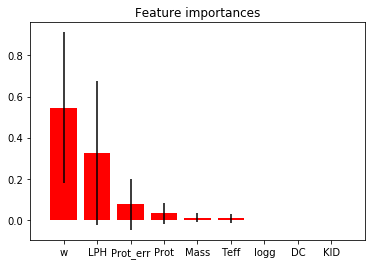

In [8]:
#plot relative importances of features

#determine importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_df.shape[1]), data_df.columns[indices])
plt.xlim([-1, data_df.shape[1]])
plt.show()

# SECOND RF classifier-------------------------------------------------------
## Remove weight feature & test again

In [9]:
#format data

# try remove w
data_df = data_df.drop('w', 1)
data_df

,DC,KID,LPH,Mass,Prot,Prot_err,Teff,logg
0,0,892376,0.823,0.4699,1.532,0.007,3813,4.47
1,0,1026146,1.405,0.6472,14.891,0.120,4261,4.57
2,0,1026474,1.204,0.5914,1.569,0.006,4122,4.56
3,1,1162635,0.978,0.4497,15.678,0.019,3760,4.77
4,0,1164102,0.568,0.5606,31.496,0.474,4045,4.62
5,1,1292688,0.530,0.4550,42.659,2.131,3774,4.74
6,0,1297303,0.777,0.6613,27.333,0.193,4296,4.61
7,0,1429921,0.943,0.6295,23.131,0.110,4217,4.72
8,0,1430349,0.376,0.6569,34.717,0.752,4285,4.54
9,1,1430893,1.429,0.5133,17.045,0.026,3925,4.72


In [10]:
# split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(data_df, data_labels,  random_state=123456)

In [11]:
# setup RF model 
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# train RF model
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [12]:
# make predicitons 
predicted = forest.predict(X_test)
# check accuracy of RF
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9875277846381822


Feature ranking:
1. feature 2 (0.621199)
2. feature 5 (0.160282)
3. feature 4 (0.111574)
4. feature 3 (0.042555)
5. feature 6 (0.040047)
6. feature 1 (0.010491)
7. feature 7 (0.009849)
8. feature 0 (0.004003)


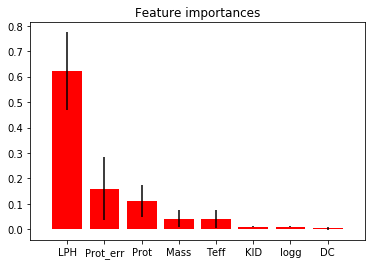

In [13]:
#plot relative importances of features

#determine importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_df.shape[1]), data_df.columns[indices])
plt.xlim([-1, data_df.shape[1]])
plt.show()

# THIRD RF classifier-------------------------------------------------------
## Inject Random Number & test again

In [14]:
#format data

# inject random number as a test
np.random.seed(seed = 42)
data_df['random'] = np.random.random(size = len(data_df))

In [15]:
# split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(data_df, data_labels,  random_state=123456)

In [16]:
# setup RF model 
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# train RF model
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [17]:
# make predicitons 
predicted = forest.predict(X_test)
#check accuracy of RF
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9890713756483083


Feature ranking:
1. feature 2 (0.700227)
2. feature 5 (0.126203)
3. feature 4 (0.093212)
4. feature 6 (0.031943)
5. feature 3 (0.027915)
6. feature 1 (0.006681)
7. feature 7 (0.006506)
8. feature 8 (0.006036)
9. feature 0 (0.001277)


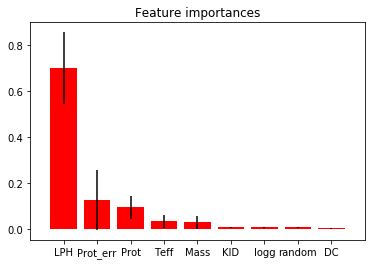

In [18]:
#plot relative importances of features

#determine importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_df.shape[1]), data_df.columns[indices])
plt.xlim([-1, data_df.shape[1]])
plt.show()

# FOURTH RF classifier-------------------------------------------------------
## trying to extend to our TESS data - not entirely apples to apples but let's see what happens

In [21]:
# remove all features we don't have

data_df = data_df.drop(["Prot_err", "DC", "KID"], 1)
data_df

,LPH,Mass,Prot,Teff,logg,random
0,0.823,0.4699,1.532,3813,4.47,0.374540
1,1.405,0.6472,14.891,4261,4.57,0.950714
2,1.204,0.5914,1.569,4122,4.56,0.731994
3,0.978,0.4497,15.678,3760,4.77,0.598658
4,0.568,0.5606,31.496,4045,4.62,0.156019
5,0.530,0.4550,42.659,3774,4.74,0.155995
6,0.777,0.6613,27.333,4296,4.61,0.058084
7,0.943,0.6295,23.131,4217,4.72,0.866176
8,0.376,0.6569,34.717,4285,4.54,0.601115
9,1.429,0.5133,17.045,3925,4.72,0.708073


In [22]:
# split into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(data_df, data_labels,  random_state=123456)

In [23]:
# setup RF model 
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# train RF model
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [24]:
# make predicitons 
predicted = forest.predict(X_test)
#check accuracy of RF
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9911706594220795


Feature ranking:
1. feature 0 (0.777118)
2. feature 2 (0.134466)
3. feature 3 (0.037210)
4. feature 1 (0.035553)
5. feature 4 (0.007979)
6. feature 5 (0.007674)


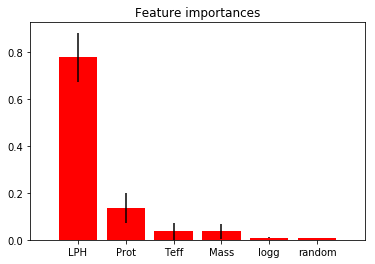

In [25]:
#plot relative importances of features

#determine importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_df.shape[1]), data_df.columns[indices])
plt.xlim([-1, data_df.shape[1]])
plt.show()

# test with our data-------------------------------------------------------
## format data

In [26]:
# load data
ourdata = pd.read_csv('data/RF_data/intern_data_for_RF.csv')

In [27]:
# drop tic column
ourdata = ourdata.drop('tic',1)
# remove nans in our data
ourdata = ourdata.dropna()
#inject random value
np.random.seed(seed = 42)
ourdata['random'] = np.random.random(size = len(ourdata))

ourdata

,Prot,Teff,Mass,logg,LPH,random
1,35.995205,3673.0,0.530160,4.70823,0.482505,0.374540
2,7.057561,3602.0,0.544927,4.69426,0.066943,0.950714
4,9.837096,4356.0,0.680000,4.60376,0.167688,0.731994
5,2.931013,3578.0,0.528984,4.70932,0.106357,0.598658
6,32.581667,4457.0,0.700000,4.55234,0.087255,0.156019
7,7.768626,4396.0,0.690000,4.34624,0.201438,0.155995
8,11.976158,3416.0,0.403650,4.81675,0.256267,0.058084
9,6.919293,3849.0,0.591651,4.64751,0.148333,0.866176
10,7.209692,3418.0,0.389239,4.82848,0.058544,0.601115
11,15.630803,3624.0,0.542123,4.69694,0.584596,0.708073


## test our data with trained RF

In [28]:
predicted = forest.predict(ourdata)
our_accuracy = np.histogram(predicted,bins = np.arange(0,3,1))
our_accuracy 

(array([ 0, 23]), array([0, 1, 2]))